In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

path = '/Users/laurentfintoni/Desktop/University/COURSE DOCS/YEAR 2/EPUB/PROJECT/EPDS/'

rhz_artworks = pd.read_pickle(path+'Rhizome_data/rhizome_artworks_extra.pkl')
rhz_artists = pd.read_pickle(path+'Rhizome_data/rhizome_artists_extra.pkl')
moma_artists = pd.read_pickle(path+'MOMA_data/pickle/MoMAartists.pkl')

In [44]:
rhizome_male_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'M']
rhizome_male_artworks = rhizome_male_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
rhizome_female_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'F']
rhizome_female_artworks = rhizome_female_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
rhizome_gender_artworks = pd.merge(rhizome_male_artworks, rhizome_female_artworks, left_on='Date Acquired', right_on='Date Acquired')
rhizome_gender_artworks = rhizome_gender_artworks.sort_values(by='Date Acquired')

rhizome_gender_artworks


,Date Acquired,Male Artists,Female Artists
8,0,77,9
15,2000,4,4
4,2001,163,70
3,2002,165,72
6,2003,103,24
2,2004,167,76
1,2005,173,63
5,2006,146,55
0,2007,180,84
7,2008,91,31


<Figure size 1080x576 with 0 Axes>

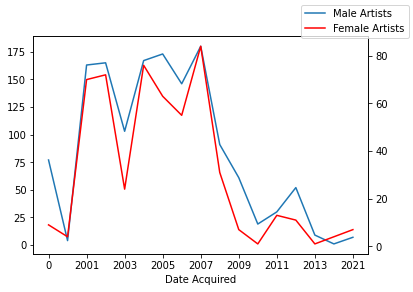

In [45]:
plt.figure(figsize=(15,8))
ax = rhizome_gender_artworks.plot(x="Date Acquired", y="Male Artists", legend=False)
ax2 = ax.twinx()
rhizome_gender_artworks.plot(x="Date Acquired", y="Female Artists", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

In [18]:
test = rhz_artworks['dateAcquired'].value_counts().rename_axis('year').reset_index(name='counts')
test = test.sort_values(by='year', ascending=True)


<AxesSubplot:xlabel='year', ylabel='counts'>

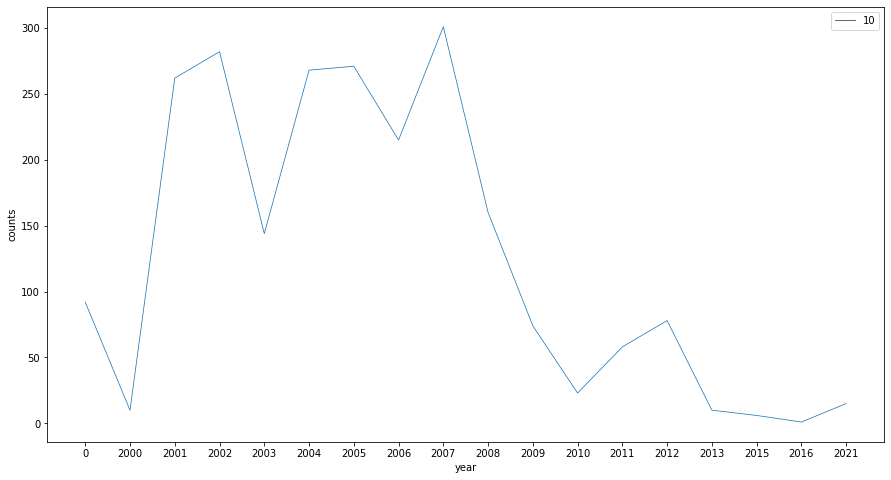

In [19]:
plt.figure(figsize=(15,8))
sns.lineplot(data=test, x="year", y="counts")

In [25]:
rhz_artworks['Gender'].value_counts()

M                                           1448
F                                            533
missing                                      156
F, M                                          46
M, M                                          29
M, F                                          27
M, M, M                                        6
M, F, M                                        6
F, F                                           5
F, M, M                                        3
N/B                                            2
F, missing                                     2
missing, M, F, F, F                            1
missing, M                                     1
F, F, F                                        1
missing, F                                     1
M, M, missing                                  1
F, M, M, M, M, F, missing, M, missing, M       1
M, F, F, M, M, M, M                            1
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Rhizome'>

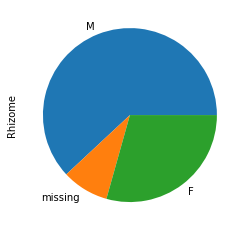

In [28]:
gender = pd.DataFrame()
gender['MOMA'] = moma_artists['Gender'].value_counts()
gender['Rhizome'] = rhz_artists['Gender'].value_counts()

In [ ]:
moma_genders = moma_artists['Gender']

In [23]:
moma_artists_2 = moma_artists.sample(n=1301)

In [ ]:
rhz_artists_copy = rhz_artists.copy()
real_gender = rhz_artists_copy['Gender']
guessed_gender = rhz_artists_copy['genderGuessed']
genders = [real_gender, guessed_gender]
rhz_artists_copy['Gender_2'] = pd.concat(genders, axis=1)

In [15]:
moma_artists['Source'] = 'MOMA'
rhz_artists['Source'] = 'Rhizome'
moma = moma_artists[['Gender', 'Source']]
rhizome = rhz_artists[['Gender', 'Source']]
frames = [moma, rhizome]
combined = pd.concat(frames, axis=0)
combined = combined.reset_index(drop=True)

In [24]:
moma_artists_2['Source'] = 'MOMA'
moma_2 = moma_artists_2[['Gender', 'Source']]
frames_2 = [moma_2, rhizome]
combined_2 = pd.concat(frames_2, axis=0)
combined_2 = combined_2.reset_index(drop=True)

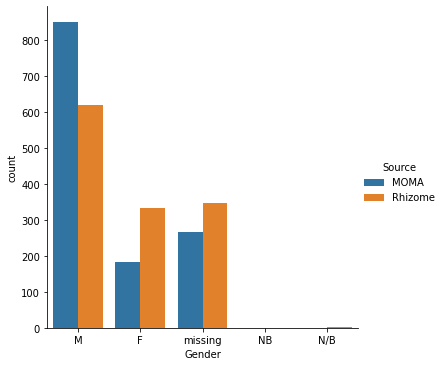

In [25]:
sns.catplot(x='Gender', kind='count', hue='Source', data=combined_2, order=['M', 'F', 'missing', 'NB', 'N/B'])

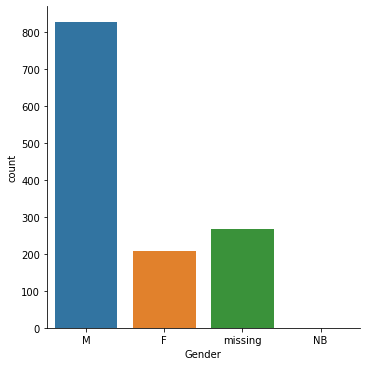

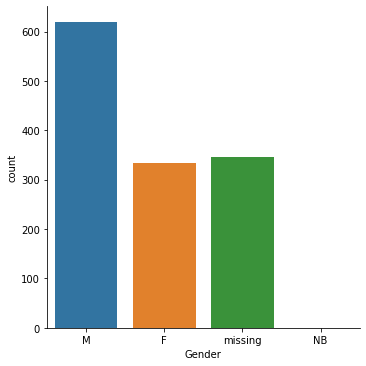

In [43]:
sns.catplot(x='Gender', kind='count', data=moma_artists_2, order=['M', 'F', 'missing', 'NB'])
sns.catplot(x='Gender', kind='count', data=rhz_artists, order=['M', 'F', 'missing', 'NB'])

In [31]:
rhz_artworks_extra

,ID,URL,Title,Artist,dateAcquired,dateCreated,Nationality,nationalityGuessed,Gender,genderGuessed
0,879,https://artbase.rhizome.org/wiki/Q2423,ZUR FARBENLEHRE (THEORY OF COLOURS),Steven Jones,2007,2007,British,missing,missing,M
1,1021,https://artbase.rhizome.org/wiki/Q4089,Zones de Convergence,cicero,2005,2005,missing,missing,missing,missing
2,"243, 701",https://artbase.rhizome.org/wiki/Q1475,Zombie and Mummy,"Dragan Espenschied, Olia Lialina",2004,2002,"German, Russian","missing, missing","M, F","missing, missing"
3,312,https://artbase.rhizome.org/wiki/Q4374,"Zaira, City of Memories",Gokcen Erguven,2004,2004,Turkish,missing,F,missing
4,920,https://artbase.rhizome.org/wiki/Q3972,Z_G [zeitgeist gestalten],Tiago Borges,2008,2007,Angolan,missing,M,missing
...,...,...,...,...,...,...,...,...,...,...
2265,1076,https://artbase.rhizome.org/wiki/Q4358,1999,joan escofet,2001,2000,missing,missing,missing,missing
2266,771,https://artbase.rhizome.org/wiki/Q3761,1969,Rhea Myers,2004,2004,British,missing,F,missing
2267,859,https://artbase.rhizome.org/wiki/Q2283,1953,Skye Thorstenson,2003,2002,missing,missing,M,missing
2268,481,https://artbase.rhizome.org/wiki/Q2511,160,Katie Lips,2005,2005,British,missing,F,missing


In [ ]:
sns.lineplot(x='dateAcquired', y='Title', data=rhz_artworks_extra)